In [1]:
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

### Read in cleaned movie data set


In [2]:
movie_df = pd.read_csv('resources/movie_dataset_us.csv', index_col=0)

### Take a look at the data

In [3]:
movie_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,Other,PG,PG-13,R,yr_old
3,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,PG-13,0,0,0,1,0,4.0
5,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,PG-13,0,0,0,1,0,4.0
6,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,0,PG-13,0,0,0,1,0,9.0
7,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,29000,PG,0,0,1,0,0,6.0
8,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000,PG-13,0,0,0,1,0,1.0


In [4]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,G,Other,PG,PG-13,R,yr_old
count,2331.000000,2330.000000,2331.000000,2329.000000,2331.000000,2.331000e+03,2.331000e+03,2331.000000,2325.000000,2331.000000,2.331000e+03,2331.000000,2330.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,189.291291,108.774678,807.211497,924.106913,8606.373659,6.102801e+07,1.118510e+05,13083.356070,1.491613,364.394680,4.777481e+07,2006.498927,2393.306009,6.313814,11110.499356,0.023595,0.001716,0.156585,0.421278,0.396825,9.501073
std,125.561751,19.585778,3159.106858,2137.893524,11841.083376,6.886835e+07,1.455573e+05,16971.106078,2.268649,411.241536,4.516566e+07,5.395943,5146.078168,1.048771,23796.059119,0.151816,0.041398,0.363487,0.493870,0.489344,5.395943
min,4.000000,46.000000,0.000000,0.000000,0.000000,1.506998e+06,5.360000e+02,0.000000,0.000000,8.000000,1.500000e+04,1997.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,95.000000,13.000000,263.000000,875.500000,1.609323e+07,2.546350e+04,2540.000000,0.000000,129.000000,1.600000e+07,2002.000000,484.250000,5.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,159.000000,105.500000,65.000000,503.000000,2000.000000,3.775293e+07,6.051600e+04,5349.000000,1.000000,235.000000,3.500000e+07,2007.000000,787.000000,6.400000,352.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,249.000000,119.000000,221.000000,756.000000,14000.000000,7.802039e+07,1.410770e+05,18395.500000,2.000000,447.500000,6.000000e+07,2011.000000,1000.000000,7.000000,14000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
max,813.000000,280.000000,23000.000000,23000.000000,164000.000000,4.745447e+08,1.468200e+06,303717.000000,43.000000,3646.000000,2.637000e+08,2016.000000,137000.000000,8.900000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000


In [5]:
movie_df.dropna(subset=['duration'],inplace=True)

In [12]:
features=['budget', 'duration','actor_1_facebook_likes','cast_total_facebook_likes', 'PG', 'PG-13', 'R',
       'yr_old']

In [13]:
df_features = movie_df[features]

In [14]:
target = movie_df['gross']

In [15]:
df_features.describe()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old
count,2.330000e+03,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,4.777943e+07,108.774678,8609.761373,13087.624893,0.156652,0.421459,0.396567,9.502575
std,4.517481e+07,19.585778,11842.495278,16973.497340,0.363551,0.493899,0.489290,5.396613
min,1.500000e+04,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.600000e+07,95.000000,876.000000,2538.500000,0.000000,0.000000,0.000000,5.000000
50%,3.500000e+07,105.500000,2000.000000,5360.000000,0.000000,0.000000,0.000000,9.000000
75%,6.000000e+07,119.000000,14000.000000,18432.250000,0.000000,1.000000,1.000000,14.000000
max,2.637000e+08,280.000000,164000.000000,303717.000000,1.000000,1.000000,1.000000,19.000000


In [16]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

13930369.921039224
[ 8.80462165e-01  2.51887147e+05 -1.65310906e+03  1.51826080e+03
 -1.98510692e+07 -2.62109191e+07 -3.24472341e+07 -1.00785605e+05]
R^2:  0.4761814140558371


In [17]:
df_features

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old
3,250000000.0,164.0,27000.0,106759,0,1,0,4.0
5,263700000.0,132.0,640.0,1873,0,1,0,4.0
6,258000000.0,156.0,24000.0,46055,0,1,0,9.0
7,260000000.0,100.0,799.0,2036,1,0,0,6.0
8,250000000.0,141.0,26000.0,92000,0,1,0,1.0
...,...,...,...,...,...,...,...,...
4960,55784951.6,100.0,1000.0,2283,0,1,0,18.0
4971,15000000.0,114.0,956.0,3861,0,0,1,7.0
4973,60000.0,84.0,1000.0,2065,0,0,1,18.0
4977,65000.0,100.0,0.0,0,1,0,0,12.0


### Create a polynomial feature 

In [ ]:
#df['budget^2'] = df['budget']**2

### Create a interaction feature

In [ ]:
#df['budget_R'] = df['budget']*df['R']

### Use SKlearn to create features

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)


In [19]:
poly_data = poly.fit_transform(df_features)

In [20]:
poly_columns = poly.get_feature_names(df_features.columns)

In [21]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [22]:
df_poly.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,PG,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget PG,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration PG,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes PG,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes PG,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,PG^2,PG PG-13,PG R,PG yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
0,250000000.0,164.0,27000.0,106759.0,0.0,1.0,0.0,4.0,6.250000e+16,4.100000e+10,6.750000e+12,2.668975e+13,0.0,250000000.0,0.0,1.000000e+09,26896.0,4428000.0,17508476.0,0.0,164.0,0.0,656.0,729000000.0,2.882493e+09,0.0,27000.0,0.0,108000.0,1.139748e+10,0.0,106759.0,0.0,427036.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
1,263700000.0,132.0,640.0,1873.0,0.0,1.0,0.0,4.0,6.953769e+16,3.480840e+10,1.687680e+11,4.939101e+11,0.0,263700000.0,0.0,1.054800e+09,17424.0,84480.0,247236.0,0.0,132.0,0.0,528.0,409600.0,1.198720e+06,0.0,640.0,0.0,2560.0,3.508129e+06,0.0,1873.0,0.0,7492.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
2,258000000.0,156.0,24000.0,46055.0,0.0,1.0,0.0,9.0,6.656400e+16,4.024800e+10,6.192000e+12,1.188219e+13,0.0,258000000.0,0.0,2.322000e+09,24336.0,3744000.0,7184580.0,0.0,156.0,0.0,1404.0,576000000.0,1.105320e+09,0.0,24000.0,0.0,216000.0,2.121063e+09,0.0,46055.0,0.0,414495.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,81.0
3,260000000.0,100.0,799.0,2036.0,1.0,0.0,0.0,6.0,6.760000e+16,2.600000e+10,2.077400e+11,5.293600e+11,260000000.0,0.0,0.0,1.560000e+09,10000.0,79900.0,203600.0,100.0,0.0,0.0,600.0,638401.0,1.626764e+06,799.0,0.0,0.0,4794.0,4.145296e+06,2036.0,0.0,0.0,12216.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,36.0
4,250000000.0,141.0,26000.0,92000.0,0.0,1.0,0.0,1.0,6.250000e+16,3.525000e+10,6.500000e+12,2.300000e+13,0.0,250000000.0,0.0,2.500000e+08,19881.0,3666000.0,12972000.0,0.0,141.0,0.0,141.0,676000000.0,2.392000e+09,0.0,26000.0,0.0,26000.0,8.464000e+09,0.0,92000.0,0.0,92000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [23]:
df_poly.shape

(2330, 44)

### Fit and Assess new model

In [24]:

#instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

#access output
# print(lm_2.intercept_)
# print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

R^2:  0.5064449045543817


### Fit third degree polynomial

In [25]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [26]:
df_poly3.shape

(2330, 164)

In [27]:

#instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(df_poly3, target)

#access output
# print(lm_3.intercept_)
# print(lm_3.coef_)
print("R^2: ", lm_3.score(df_poly3, target))

R^2:  0.29541648936183873


# Model Evaluation

Agenda:
- R^2 
- Bias versus Variance
- Train Test Split
- Model Evaluation


##  Coefficient of Determination ($R^2$)

The _coefficient of determination_, is a measure of how well the model fits the data.

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.


$$\text{TSS }= \text{ESS} + \text{RSS }$$

- TSS or SST = Total Sum of Squares 
- ESS or SSE = Explained Sum of Squares
- RSS or SSR = Residual Sum of Squares

The actual calculation of $R^2$ is: <br/> $$\Large R^2= \frac{\Sigma_i(\bar{y} - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}=1- \frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$$.

$R^2$ takes values between 0 and 1.

$R^2$ is a measure of how much variation in the dependent variable your model explains.


<img src='https://pbs.twimg.com/media/D-Gu7E0WsAANhLY.png' width ="700">

## What Is the Adjusted R-squared?

The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

Suppose you compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out!

$$Adjusted R^2=1-\left(\frac{n-1}{n-p}\right)(1-R^2)$$

Where:

n = sample size   

p  = the number of independent variables in the regression equation


- The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 

- The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. 

- It is always lower than the R-squared.

## Probabilistic Model Selection
Probabilistic model selection (or “information criteria”) provides an analytical technique for scoring and choosing among candidate models.

Models are scored both on their performance on the training dataset and based on the complexity of the model.

- **Model Performance:** How well a candidate model has performed on the training dataset.
- **Model Complexity:** How complicated the trained candidate model is after training.

Model performance may be evaluated using a probabilistic framework, such as log-likelihood under the framework of maximum likelihood estimation. Model complexity may be evaluated as the number of degrees of freedom or parameters in the model.

### Akaike Information Criterion vs. Bayesian Information Criterion

The model with the lower AIC or BIC should be selected. 

Despite various subtle theoretical differences, their only difference in practice is the size of the penalty; BIC penalizes model complexity more heavily.

Compared to the BIC method (below), the AIC statistic penalizes complex models less, meaning that it may put more emphasis on model performance on the training dataset, and, in turn, select more complex models.

A downside of BIC is that for smaller, less representative training datasets, it is more likely to choose models that are too simple.

https://machinelearningmastery.com/probabilistic-model-selection-measures/

https://www.methodology.psu.edu/resources/AIC-vs-BIC/

## The Machine Learning Process

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.


<img src='https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png' width ="400">

**A proper machine learning workflow includes:**

* Separate training and test sets
* Trying appropriate algorithms (No Free Lunch)
* Fitting model parameters
* Tuning impactful hyperparameters
* Proper performance metrics
* Systematic cross-validation

# Prediction Evaluation

## Bias - Variance 

There are 3 types of prediction error: bias, variance, and irreducible error.


**Total Error = Bias + Variance + Irreducible Error**

### The Bias-Variance Tradeoff


**Let's do a thought experiment:**

1. Imagine you've collected 5 different training sets for the same problem.
2. Now imagine using one algorithm to train 5 models, one for each of your training sets.
3. Bias vs. variance refers to the accuracy vs. consistency of the models trained by your algorithm.

<img src='resources/Bias-vs.-Variance-v5-2-darts.png' width=500 />

**High bias** algorithms tend to be less complex, with simple or rigid underlying structure.

+ They train models that are consistent, but inaccurate on average.
+ These include linear or parametric algorithms such as regression and naive Bayes.

On the other hand, **high variance** algorithms tend to be more complex, with flexible underlying structure.

+ They train models that are accurate on average, but inconsistent.
+ These include non-linear or non-parametric algorithms such as decision trees and nearest neighbors.

### Bias-Variance Tradeoff

This tradeoff in complexity is why there's a tradeoff in bias and variance - an algorithm cannot simultaneously be more complex and less complex.

**Total Error = Bias^2 + Variance + Irreducible Error**


<img src='resources/Bias-vs.-Variance-v4-chart.png' width=500 />

### Error from Bias

**Bias** is the difference between your model's expected predictions and the true values.

<img src='resources/noisy-sine-linear.png' width=500 />

### Error from Variance

**Variance** refers to your algorithm's sensitivity to specific sets of training data.



<img src='resources/noisy-sine-decision-tree.png' width=500/>

Which one is overfit and which one is underfit?

We want to try to find the proper balance of variance and bias

<img src='resources/noisy-sine-third-order-polynomial.png' width=500 />


# Train Test Split

**How do we know if our model is overfitting or underfitting?**



If our model is not performing well on the training  data, we are probably underfitting it.  


To know if our  model is overfitting the data, we need  to test our model on unseen data. 
We then measure our performance on the unseen data. 

If the model performs way worse on the  unseen data, it is probably  overfitting the data.

The previous module introduced the idea of dividing your data set into two subsets:

* **training set** —a subset to train a model.
* **test set**—a subset to test the trained model.

You could imagine slicing the single data set as follows:

<img src='resources/testtrainsplit.png' width =550 />

**Never train on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. 



<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' width=500/>

## Model Evaluation Metrics for Regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:



![alt text](resources/mae.png)

**Mean Squared Error** (MSE) is the mean of the squared errors:

![alt text](resources/mse.png)

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:



![alt text](resources/rmse.png)

MSE is more popular than MAE because MSE "punishes" larger errors. 

But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

Additionally, I like to divide the RMSE by the standard deviation to  convert it to something similiar to a Z-Score.

# Practicum

### Identify my features and target variable

In [28]:
features

['budget',
 'duration',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'PG',
 'PG-13',
 'R',
 'yr_old']

In [29]:
df_features.columns

Index(['budget', 'duration', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'PG', 'PG-13', 'R', 'yr_old'],
      dtype='object')

### Create Train and Test Split

The random state variable makes it so you can always have the same 'random' split

In [30]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (1864, 8) Target:  (1864,)
Training set - Features:  (466, 8) Target:  (466,)


In [31]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

17594320.536407493
[ 8.85818679e-01  2.59484843e+05 -1.96844519e+03  1.89311008e+03
 -2.72449500e+07 -3.40101357e+07 -3.96070729e+07 -1.51876332e+04]


### How well did our model perform

Previously we have looked at the R^2 of the model  to  determine  how good of a model this is.  

In [32]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.5015535075029656


In [33]:
y_train_pred = lm.predict(X_train)

In [34]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 33530247.408113774
Mean Squared Error: 2546628348789598.5
Root Mean Squared Error: 50464129.32756889


Sometimes it is difficult to understand how good or bad a model is because of the scale of the data. Therefore you can divid the RMSE by the standard deviation of the target variable to transform the metric to a Z-Score.

In [35]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.4868453507627729
Z-Score of Root Mean Squared Error: 0.7327183257667553


### Predicting the Test Set

In [36]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

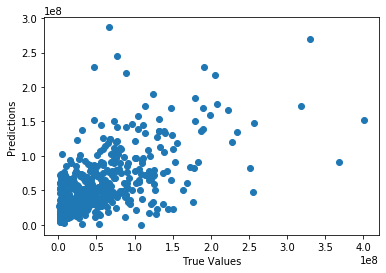

In [37]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

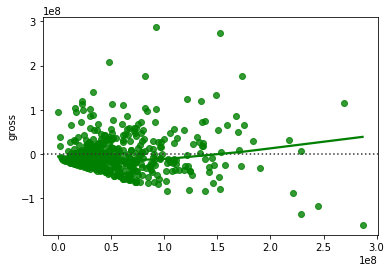

In [38]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [39]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.2942126418477592


In [40]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:32878479.134517185
Mean Squared Error:2293026824189180.5
Root Mean Squared Error:47885559.6624826


In [41]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.477381944486254
Root Mean Squared Error Z: 0.6952785586876313


### Comparing our Model's performance on training data versus test data.

In [42]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  50464129 vs. Testing:  47885559


## Evaluate Polynomial model

### Train Test Split the polynomial data

In [44]:

#call train_test_split on the data and capture the results
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train_2.shape, "Target: ", y_train_2.shape)
print("Training set - Features: ", X_test_2.shape, "Target: ",y_test_2.shape)


Training set - Features:  (1864, 44) Target:  (1864,)
Training set - Features:  (466, 44) Target:  (466,)


### Fit the Model

In [45]:
#instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2.fit(X_train_2, y_train_2)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_train_2_pred = lm_2.predict(X_train_2)

### Evaluate Training Data

In [47]:

mae_2 = metrics.mean_absolute_error(y_train_2, y_train_2_pred)
mse_2 = metrics.mean_squared_error(y_train_2, y_train_2_pred)
rmse_2 = np.sqrt(metrics.mean_squared_error(y_train_2, y_train_2_pred))


print('Mean Absolute Error:', mae_2 )
print('Mean Squared Error:',  mse_2)
print('Root Mean Squared Error:' , rmse_2)

Mean Absolute Error: 32799771.653790627
Mean Squared Error: 2386510434247176.0
Root Mean Squared Error: 48851923.547053665


### Predict the test set

In [ ]:
y = lm_2.predict(X_test_2)

### Evaluate the test set

In [ ]:
mae_2 = metrics.mean_absolute_error(y_test_2, ____)
rmse_2 = np.sqrt(metrics.mean_squared_error(____, ____))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(____, ____)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(____, ____)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(____, ____))))

### Comparing our Model's performance on training data versus test data.


In [ ]:

print('Training: ', int(____), "vs. Testing: ", int(____))